# Sample Exploratory Data Analysis

Dataset: Information scraped from Wikipedia about over 1000 rollercoasters.

Business Understanding/Goal: Get some information about rollercoasters!

## 1. Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

## 2. Load the Dataset

In [18]:
df = pd.read_csv("data/coaster.csv")

## 3. Understand the Data

In [16]:
# Other useful functions for understanding the data
df.head(10)
# df.describe()
# df.columns

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,40 ft (12 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,41 ft (12 m),NaN,NaN,NaN,NaN,NaN,1:00,NaN,NaN,Edward Joy Morris,25°,9 ft (2.7 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,Wood,1902-01-01,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1904,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,60 ft (18 m),NaN,NaN,NaN,NaN,NaN,1 minute 30 seconds,NaN,NaN,"Christopher Feucht, Welcome Mosley",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,41.58

## 4. Data Processing/Preparation

### 4.1. Dropping Unnecessary Columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1086 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          936 non-null    object 
 3   Location                       1086 non-null   object 
 4   Status                         873 non-null    object 
 5   Opening date                   836 non-null    object 
 6   Type                           1086 non-null   object 
 7   Manufacturer                   1027 non-null   object 
 8   Height restriction             830 non-null    object 
 9   Model                          743 non-null    object 
 10  Height                         964 non-null    object 
 11  Inversions                     931 non-null    float64
 12  Lift/launch system             794 non-null    o

In [19]:
#useful columns: coaster_name, length, speed, location, height, manufacturer, status, type, inversions, duration, year_introduced, Type_Main (repeated), speeds (repeated), height (repeated), Inversions_clean (repeated)
df = df[['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced', 'Type_Main', 'speed_mph', 'height_value', 'Inversions_clean', 'opening_date_clean']]

df.shape

(1086, 10)

In [25]:
# Rename our columns for consistency
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'Type_Main': 'Type',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_value':'Height_ft',
                   'Inversions_clean':'Inversions'})
df.head(10)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Type,Speed_mph,Height_ft,Inversions,Opening_Date
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,Wood,6.0,50.0,0,1884-06-16
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,Wood,NaN,NaN,1,1895-01-01
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,Other,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,Steel,NaN,NaN,1,1901-01-01
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,Steel,NaN,NaN,1,1901-01-01
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,Wood,NaN,40.0,0,1902-01-01
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,Wood,10.0,41.0,0,1902-01-01
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1904,Other,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,Removed,Arthur Jarvis,1907,Other,NaN,60.0,0,1907-06-06
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1907,Other,NaN,NaN,0,NaN


### 4.2. Checking for Duplicates

In [28]:
df.duplicated().sum()

df.duplicated(["Coaster_Name"]).sum()

df.loc[df.duplicated(["Coaster_Name"], keep=False)].sort_values(["Coaster_Name"])

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Type,Speed_mph,Height_ft,Inversions,Opening_Date
467,Afterburn (roller coaster),Carowinds,Operating,Bolliger & Mabillard,1999,Steel,62.0,113.0,6,1999-03-20
780,Afterburn (roller coaster),Carowinds,Operating,Bolliger & Mabillard,2009,Steel,62.0,113.0,6,1999-03-20
270,Alpine Bobsled,Other,NaN,Intamin,1989,Steel,35.0,64.0,0,NaN
435,Alpine Bobsled,Other,NaN,Intamin,1998,Steel,35.0,64.0,0,NaN
206,Alpine Bobsled,Other,NaN,Intamin,1984,Steel,35.0,64.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
232,Wild Mouse (Idlewild),Idlewild and Soak Zone,Operating,Vekoma,1985,Steel,30.0,56.0,0,1985-01-01
749,Wipeout (roller coaster),Pleasurewood Hills,Operating,Vekoma,2007,Steel,50.0,120.0,6,2007-01-01
268,Wipeout (roller coaster),Pleasurewood Hills,Operating,Vekoma,1988,Steel,50.0,120.0,6,2007-01-01
858,Zippin Pippin,Other,NaN,The Gravity Group,2011,Wood,40.0,70.0,0,NaN


There are duplicated rows with different opening dates. The rollercoasters were opened, closed, and then opened again. We will keep the first opening date.

In [34]:
df = df.sort_values(["Year_Introduced"]).reset_index(drop=True)

df = df.drop_duplicates(["Coaster_Name", "Location"], keep="first").reset_index(drop=True)

df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Type,Speed_mph,Height_ft,Inversions,Opening_Date
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,Wood,6.0,50.0,0,1884-06-16
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,Wood,NaN,NaN,1,1895-01-01
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,Other,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,Steel,NaN,NaN,1,1901-01-01
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,Steel,NaN,NaN,1,1901-01-01
...,...,...,...,...,...,...,...,...,...,...
984,Aquaman: Power Wave,Six Flags Over Texas,Under construction,Mack Rides,2022,Steel,62.1,146.3,0,2022-01-01
985,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,Steel,34.0,112.0,0,NaN
986,Fønix (roller coaster),Fårup Sommerland,Under construction,Vekoma,2022,Steel,59.0,131.2,3,NaN
987,Emperor (roller coaster),SeaWorld San Diego,Under construction,Bolliger & Mabillard,2022,Steel,63.0,153.0,4,2022-03-01


In [35]:
df.shape

(989, 10)

### 4.3. Checking for Null Values

### 4.4. String formatting and Categorization

We will condense our categories into the following 5: In Production, Operating, Non-operational, Closed, Removed.

In [36]:
# Possible statuses: In Production, Operating, Non-operational, Closed, Removed
status_dt = {"Non-operational": ["Temporarily closed", "Temporarily Closed", "Under Maintenance", "Not Currently Operating", "Under construction"],
             "Closed": ["Closed in 2021", "closed for maintenance as of july 30 no reopening date known", "SBNO (Standing But Not Operating)", "SBNO December 2019"],
             "Removed": ["Chapter 7 bankruptcy; rides dismantled and sold; property sold", "Discontinued"]}

def organize_status(word):
    for key in status_dt:
        if word in status_dt[key]:
            return key
    return word
df["Status"] = df["Status"].map(organize_status)
df["Status"].value_counts()

Status
Operating          645
Removed            142
Closed              27
Non-operational     18
In Production       11
Name: count, dtype: int64

In [37]:
# Type
df["Type"].value_counts()

Type
Steel    727
Wood     191
Other     71
Name: count, dtype: int64

### 4.4. Other Possible Steps
* Creating new columns
* Removing rows with missing values
* Imputation if necessary
* String formatting

## 5. Univariate Analysis
AKA Feature Analysis

(Descriptive Statistics for individual columns)

[Seaborn Documentation](https://seaborn.pydata.org/tutorial/introduction.html)

[Seaborn Style Documentation](https://python-charts.com/seaborn/themes/)

In [ ]:
df.columns

### 5.1. Numerical Data

<Axes: xlabel='Height_ft'>

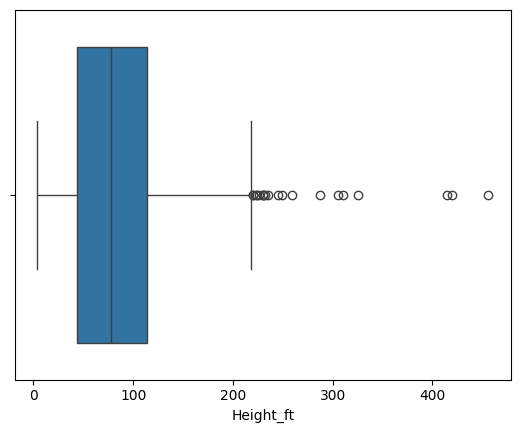

In [38]:
sns.boxplot(data=df, x="Height_ft")

# df.loc[df["Height_ft"]]

<Axes: xlabel='Year_Introduced', ylabel='Count'>

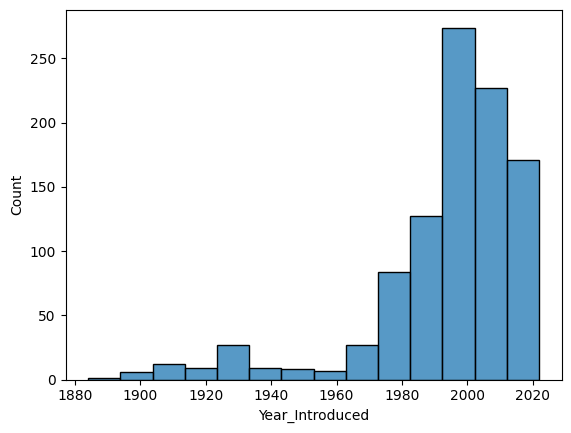

In [40]:
sns.histplot(data=df, x="Year_Introduced", binwidth=10)

### 5.2. Categorical Data

### 5.3. Multiple Plots

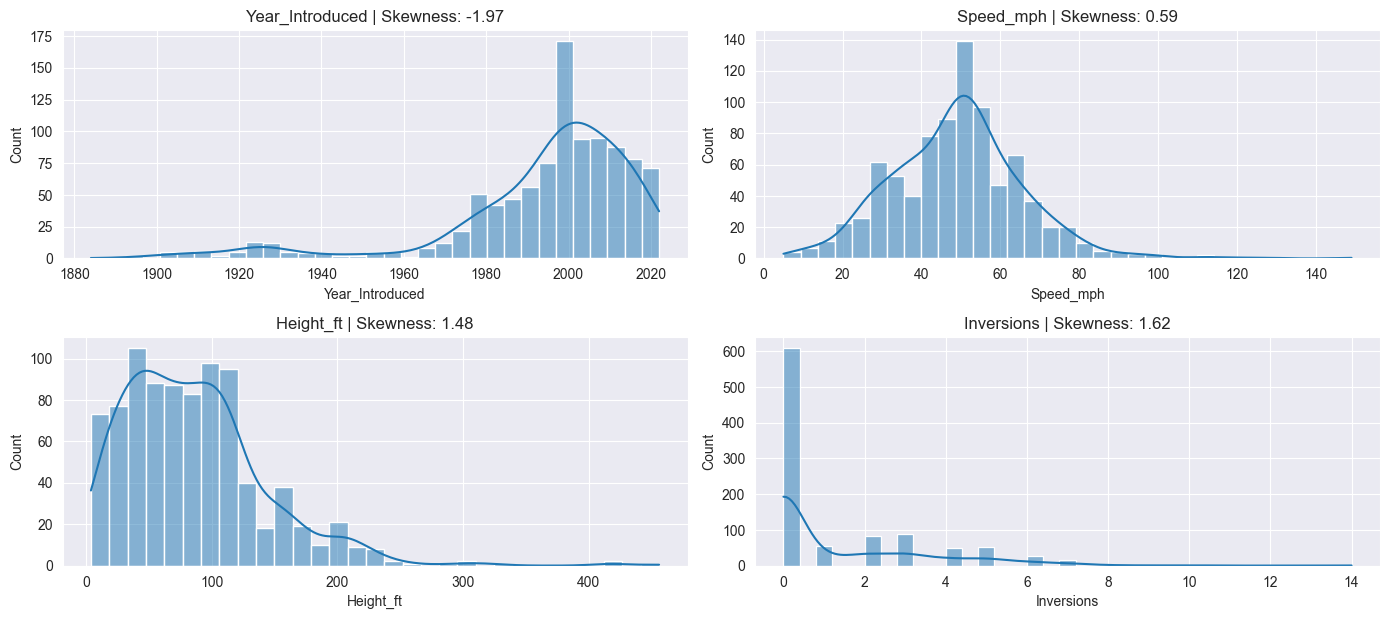

In [41]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


## 6. Multivariate Analysis

### 6.1. Scatter Plots

#### 6.1.1. Two Numerical Values

Text(0.5, 1.0, 'Height vs Speed')

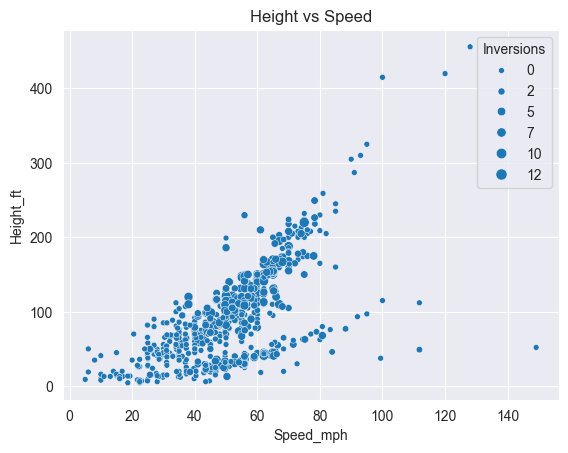

In [44]:
sns.scatterplot(data=df, x="Speed_mph", y="Height_ft", size="Inversions")
plt.title("Height vs Speed")

#### 6.1.2. Three Numerical Values

Text(0.5, 1.0, 'Height vs Speed')

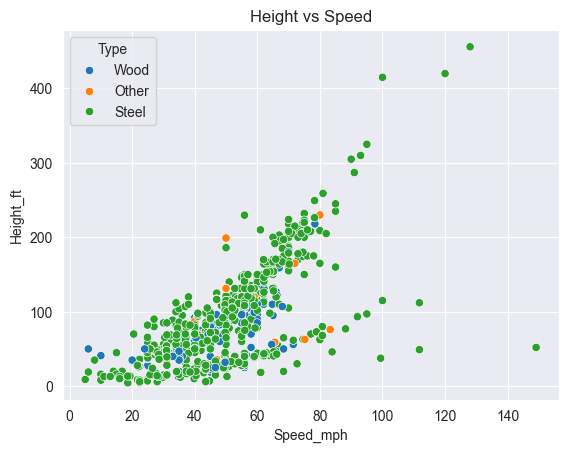

In [45]:
sns.scatterplot(data=df, x="Speed_mph", y="Height_ft", hue="Type")
plt.title("Height vs Speed")

#### 6.1.3. Categorical Values

In [ ]:
plt.title("Height vs Speed")

## 7. Statistical Analysis

We now have enough of an understanding of our data to formulate some questions. For example, we could try to figure out:
* The average speeds of different types of rollercoasters
* Which manufacturer has been most successful in maintaining open coasters
* Where the fastest coasters are located
* The status of different types of coasters